In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_path = r'E:\INTM586\dogs-vs-cats 2\dogs-vs-cats\train'
valid_path = r'E:\INTM586\dogs-vs-cats 2\dogs-vs-cats\test'

In [4]:
vgg = VGG16(input_shape=[224, 224,3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
  layer.trainable = False

In [6]:
folders = glob( r'E:\INTM586\dogs-vs-cats 2\dogs-vs-cats\train/*')

In [7]:
folders

['E:\\INTM586\\dogs-vs-cats 2\\dogs-vs-cats\\train\\cat',
 'E:\\INTM586\\dogs-vs-cats 2\\dogs-vs-cats\\train\\dog']

In [8]:
x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# cv_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')
# cv_set = cv_datagen.flow_from_directory(valid_path,
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 2037 images belonging to 2 classes.
Found 114 images belonging to 2 classes.


In [14]:
training_set.class_indices

{'cat': 0, 'dog': 1}

In [15]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=6,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/6
408/408 [==============================] - 448s 1s/step - loss: 0.4762 - accuracy: 0.8115 - val_loss: 0.1896 - val_accuracy: 0.9386
Epoch 2/6
408/408 [==============================] - 444s 1s/step - loss: 0.2533 - accuracy: 0.8920 - val_loss: 0.1727 - val_accuracy: 0.9298
Epoch 3/6
408/408 [==============================] - 443s 1s/step - loss: 0.2186 - accuracy: 0.9092 - val_loss: 0.1779 - val_accuracy: 0.9298
Epoch 4/6
408/408 [==============================] - 412s 1s/step - loss: 0.1872 - accuracy: 0.9249 - val_loss: 0.1912 - val_accuracy: 0.9298
Epoch 5/6
408/408 [==============================] - 416s 1s/step - loss: 0.1747 - accuracy: 0.9200 - val_loss: 0.1746 - val_accuracy: 0.9211
Epoch 6/6
408/408 [==============================] - 432s 1s/step - loss: 0.1152 - accuracy: 0.9593 - val_loss: 0.3013 - val_accuracy: 0.9386


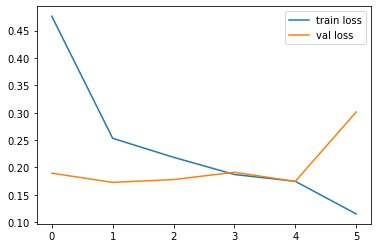

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

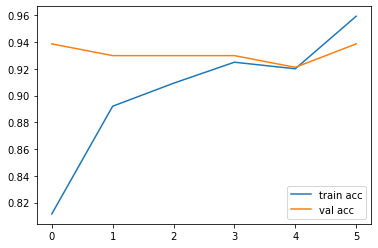

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [18]:
from keras.models import load_model

model.save('cat_dog_vgg.h5')